# BigQuery - Basics

This notebook demonstrates how you can quickly get started using BigQuery, exploring tables, schema and data, as well as how you can integrate BigQuery results with the world of python data analysis and visualization - all within a notebook.

This notebook uses a sample dataset of request logs data from a web server.

Related Links:

* [BigQuery](https://cloud.google.com/bigquery/)
* BigQuery [SQL reference](https://cloud.google.com/bigquery/query-reference)
* Python [Pandas](http://pandas.pydata.org/) for data analysis
* Python [matplotlib](http://matplotlib.org/) for data visualization

----

NOTE:

* If you're new to notebooks, or want to check out additional samples, check out the full [list](..) of notebooks.

# Python APIs for working with BigQuery

Using the python APIs in the `PyGCP` library you can directly work with all the datasets that are contained or shared with your cloud project. The following `gcp.bigquery` import makes the BigQuery functionality available to this notebook.

In [1]:
import gcp
import gcp.bigquery as bq 

# Tables

You can explore the tables you have within your BigQuery datasets, as well as list their schema using the following APIs.

In [2]:
logs_table = bq.Table('cloud-datalab:sampledata.requestlogs_20140616')
logs_table.schema

[{ 'name': 'timestamp', 'type': 'TIMESTAMP', 'mode':'None', 'description': 'None' },
 { 'name': 'latency', 'type': 'INTEGER', 'mode':'None', 'description': 'None' },
 { 'name': 'status', 'type': 'INTEGER', 'mode':'None', 'description': 'None' },
 { 'name': 'method', 'type': 'STRING', 'mode':'None', 'description': 'None' },
 { 'name': 'endpoint', 'type': 'STRING', 'mode':'None', 'description': 'None' }]

# SQL

You can directly author a SQL statement to execute in a notebook, and save both the query and the resultset.

In [3]:
%%sql
select * from [cloud-datalab:sampledata.requestlogs_20140615] limit 10

(rows: 10, time: 3.5s, 24MB processed, job: job_k6JsTMdZUKV6c8LttU3hyi4EHZ0)

In the above cell, the SQL was defined and executed at once with BigQuery. You can also define a SQL query, and use it later, by giving a --module argument to `%%sql`. This will create a module containing any queries. Queries themselves can be given names with `DEFINE QUERY <name>` but it is allowed to specify the last query in the cell without a name. The module name can then be used in many places to refer to that query. For example:

In [4]:
%%sql --module my_query_module
define query query1
select * from [cloud-datalab:sampledata.requestlogs_20140615] limit 5

select * from [cloud-datalab:sampledata.requestlogs_20140615] limit 100

In [5]:
print bq.Query(my_query_module).sql
print bq.Query(my_query_module.query1).sql

select * from [cloud-datalab:sampledata.requestlogs_20140615] limit 100
select * from [cloud-datalab:sampledata.requestlogs_20140615] limit 5


In [6]:
bq.Query(my_query_module).results()

(rows: 100, time: 2.8s, 24MB processed, job: job_3SxducjESTl8S38VDg7d927TTqg)

# Integrating Python and Pandas

You might be familiar with Python and Pandas, a powerful data analysis library. You can easily create a Pandas DataFrame from your BigQuery SQL, and then use familiar python libraries against your data. In the SQL module below we will use a variable for the source table; when we instantiate that in Python as a query we need to provide a value for the variable as a keyword argument:

In [7]:
%%sql --module my_data
SELECT INTEGER(timestamp / 300000000) * 300000000 AS window,
       NTH(99, QUANTILES(latency, 100)) as latency
FROM $logs_table
WHERE endpoint = 'Recent'
GROUP BY window
ORDER by window

In [8]:
df = bq.Query(my_data, logs_table=logs_table).to_dataframe()
df[:10]

,window,latency
0,1402902000000000,325
1,1402902600000000,286
2,1402902900000000,318
3,1402903200000000,363
4,1402903500000000,323
5,1402903800000000,398
6,1402904100000000,449
7,1402904400000000,319
8,1402904700000000,305
9,1402905000000000,387


# Visualizing Data

Using various plotting libraries (such as matplotlib), you can directly visualize your data right in the notebook.

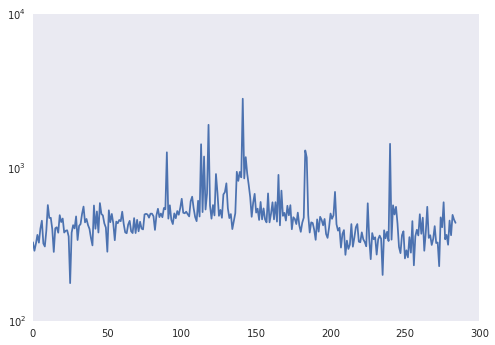

In [9]:
import numpy as np
import matplotlib.pyplot as plot

latency_timeseries = df['latency'].values
latency_timeseries_length = len(latency_timeseries)

latency_ticks = np.array(range(latency_timeseries_length))

plot.plot(latency_ticks, latency_timeseries)
plot.yscale('log')
plot.grid()